**Import Library**

In [ ]:
# numpy and pandas for data manipulation
import numpy as np
import pandas as pd 

# sklearn preprocessing for dealing with categorical variables
from sklearn.preprocessing import LabelEncoder

# File system manangement
import os

# Suppress warnings 
import warnings
warnings.filterwarnings('ignore')

# matplotlib and seaborn for plotting
import matplotlib.pyplot as plt
import seaborn as sns

**Read in Data**

In [ ]:
from google.colab import drive
# Mount Google Drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Training data
Train = pd.read_csv('/content/gdrive/My Drive/Project Dataset & Modelling/application_train.csv')
print('Training data shape: ', Train.shape)
Train.head()

Training data shape:  (307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,...,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,...,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437,NaN,1,1,0,1,0,0,Laborers,2.0,2,2,WEDNESDAY,17,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458,NaN,1,1,0,1,0,0,Core staff,1.0,2,2,THURSDAY,11,0,0,0,0,1,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Testing data
Test = pd.read_csv('/content/gdrive/My Drive/Project Dataset & Modelling/application_test.csv')
print('Testing data shape: ', Test.shape)
Test.head()

Testing data shape:  (48744, 121)


,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,...,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,Unaccompanied,Working,Higher education,Married,House / apartment,0.018850,-19241,-2329,-5170.0,-812,NaN,1,1,0,1,0,1,NaN,2.0,2,2,TUESDAY,18,0,0,0,0,0,0,Kindergarten,...,NaN,0.0514,NaN,NaN,NaN,block of flats,0.0392,"Stone, brick",No,0.0,0.0,0.0,0.0,-1740.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.035792,-18064,-4469,-9118.0,-1623,NaN,1,1,0,1,0,0,Low-skill Laborers,2.0,2,2,FRIDAY,9,0,0,0,0,0,0,Self-employed,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,NaN,Working,Higher education,Married,House / apartment,0.019101,-20038,-4458,-2175.0,-3503,5.0,1,1,0,1,0,0,Drivers,2.0,2,2,MONDAY,14,0,0,0,0,0,0,Transport: type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-856.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.026392,-13976,-1866,-2000.0,-4208,NaN,1,1,0,1,1,0,Sales staff,4.0,2,2,WEDNESDAY,11,0,0,0,0,0,0,Business Entity Type 3,...,0.2446,0.3739,0.0388,0.0817,reg oper account,block of flats,0.3700,Panel,No,0.0,0.0,0.0,0.0,-1805.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,Unaccompanied,Working,Secondary / secondary special,Married,House / apartment,0.010032,-13040,-2191,-4000.0,-4262,16.0,1,1,1,1,0,0,NaN,3.0,2,2,FRIDAY,5,0,0,0,0,1,1,Business Entity Type 3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,-821.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


**Exploratory Data Analysis**

In [ ]:
Train['TARGET'].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

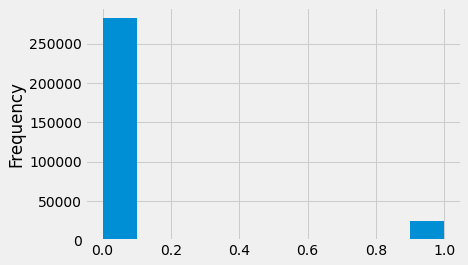

In [ ]:
Train['TARGET'].astype(int).plot.hist();

Dari informasi diatas, terlihat masalah kelas yang tidak seimbang. Lebih banyak pinjaman yang dilunasi tepat waktu daripada pinjaman yang tidak dilunasi. 

**Examine Missing Values**

Selanjutnya kita bisa melihat jumlah dan persentase missing values dari setiap kolom

In [ ]:
# Function untuk menghitung missing values  
def missing_values_table(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Buat tabel dengan hasilnya
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename kolom
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Mengurutkan tabel berdasarkan persentase penurunan yang hilang
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print informasi ringkasan
        print ("Dataframe pilihan Anda memiliki " + str(df.shape[1]) + " kolom.\n"      
            "Ada " + str(mis_val_table_ren_columns.shape[0]) +
              " kolom yang memiliki missing values.")
        
        # Kembalikan kerangka data dengan informasi yang hilang
        return mis_val_table_ren_columns

In [ ]:
# Missing values statistik
missing_values = missing_values_table(Train)
missing_values.head(20)

Dataframe pilihan Anda memiliki 122 kolom.
Ada 67 kolom yang memiliki missing values.


,Missing Values,% of Total Values
COMMONAREA_MEDI,214865,69.9
COMMONAREA_AVG,214865,69.9
COMMONAREA_MODE,214865,69.9
NONLIVINGAPARTMENTS_MEDI,213514,69.4
NONLIVINGAPARTMENTS_MODE,213514,69.4
NONLIVINGAPARTMENTS_AVG,213514,69.4
FONDKAPREMONT_MODE,210295,68.4
LIVINGAPARTMENTS_MODE,210199,68.4
LIVINGAPARTMENTS_MEDI,210199,68.4
LIVINGAPARTMENTS_AVG,210199,68.4


Type kolom

In [ ]:
# Jumlah tiap jenis kolom
Train.dtypes.value_counts()

float64    65
int64      41
object     16
dtype: int64

In [ ]:
# Jumlah kelas unik di setiap kolom
Train.select_dtypes('object').apply(pd.Series.nunique, axis = 0)

NAME_CONTRACT_TYPE             2
CODE_GENDER                    3
FLAG_OWN_CAR                   2
FLAG_OWN_REALTY                2
NAME_TYPE_SUITE                7
NAME_INCOME_TYPE               8
NAME_EDUCATION_TYPE            5
NAME_FAMILY_STATUS             6
NAME_HOUSING_TYPE              6
OCCUPATION_TYPE               18
WEEKDAY_APPR_PROCESS_START     7
ORGANIZATION_TYPE             58
FONDKAPREMONT_MODE             4
HOUSETYPE_MODE                 3
WALLSMATERIAL_MODE             7
EMERGENCYSTATE_MODE            2
dtype: int64

Label Encoding dan One-Hot Encoding

In [ ]:
# Membuat label encoder object
le = LabelEncoder()
le_count = 0

# Iterasi melalui kolom
for col in Train:
    if Train[col].dtype == 'object':
        # Jika 2 atau kurang dari kategori unik
        if len(list(Train[col].unique())) <= 2:
            # Train di data training
            le.fit(Train[col])
            # Mengubah data training dan testing
            Train[col] = le.transform(Train[col])
            Test[col] = le.transform(Test[col])
            
            # Melihat berapa banyak kolom yang di encoder labelnya
            le_count += 1
            
print('%d kolom yang diberi label encoded.' % le_count)

3 kolom yang diberi label encoded.


In [ ]:
# one-hot encoding variabel kategori
Train = pd.get_dummies(Train)
Test = pd.get_dummies(Test)

print('Training Features shape: ', Train.shape)
print('Testing Features shape: ', Test.shape)

Training Features shape:  (307511, 243)
Testing Features shape:  (48744, 239)


**Menyelaraskan Data Training dan Data Testing**

Harus ada fitur yang sama di data Training dan Test. Encoding one-hot telah membuat lebih banyak kolom dalam data training karena ada beberapa variabel kategori dengan kategori yang tidak terwakili dalam data Test. Untuk menghapus kolom dalam data Training yang tidak ada dalam data Test, kita perlu menyelaraskan kerangka data. Pertama kita mengekstrak kolom TARGET dari data Training (karena ini tidak ada dalam data Test tetapi kita perlu menyimpan informasi ini). Saat kita melakukan perataan, kita harus memastikan untuk mengatur axis = 1 untuk menyelaraskan kerangka data berdasarkan kolom dan bukan pada baris!

In [ ]:
Train_labels = Train['TARGET']

# Sejajarkan data Training dan Test, pertahankan kolom yang ada di kedua kerangka data
Train, Test_app = Train.align(Test, join = 'inner', axis = 1)

# Tambahkan target kembali
Train['TARGET'] = Train_labels

print('Training Features shape: ', Train.shape)
print('Testing Features shape: ', Test.shape)

Training Features shape:  (307511, 240)
Testing Features shape:  (48744, 239)


**Kembali ke Exploratory Data Analysis**

Masalah yang perlu diperhatikan saat EDA adalah anomali dalam data, Salah satu cara untuk mendukung anomali secara kuantitatif adalah dengan melihat statistik suatu kolom dengan menggunakan metode describe.

In [ ]:
(Train['DAYS_BIRTH'] / -365).describe()

count    307511.000000
mean         43.936973
std          11.956133
min          20.517808
25%          34.008219
50%          43.150685
75%          53.923288
max          69.120548
Name: DAYS_BIRTH, dtype: float64

In [ ]:
Train['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      63815.045904
std      141275.766519
min      -17912.000000
25%       -2760.000000
50%       -1213.000000
75%        -289.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

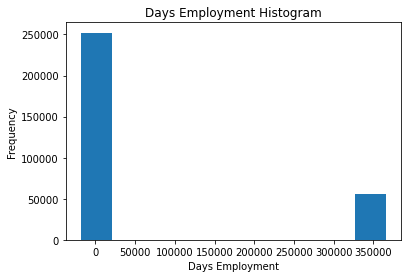

In [ ]:
Train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Melihat subset klien yang tidak normal dan lihat apakah mereka cenderung memiliki tingkat default yang lebih tinggi atau rendah daripada klien lainnya.

In [ ]:
anom = Train[Train['DAYS_EMPLOYED'] == 365243]
non_anom = Train[Train['DAYS_EMPLOYED'] != 365243]
print('The non-anomalies default on %0.2f%% of loans' % (100 * non_anom['TARGET'].mean()))
print('The anomalies default on %0.2f%% of loans' % (100 * anom['TARGET'].mean()))
print('There are %d anomalous days of employment' % len(anom))

The non-anomalies default on 8.66% of loans
The anomalies default on 5.40% of loans
There are 55374 anomalous days of employment


dari hasil terlihat anomali tersebut memiliki tingkat default yang lebih rendah.

Penanganan anomali bergantung pada situasi sebenarnya, tanpa aturan yang ditetapkan. Salah satu pendekatan teraman adalah dengan menyetel anomali ke nilai yang hilang dan kemudian mengisinya (menggunakan Imputation) sebelum pembelajaran mesin.
Sebagai solusinya, kita akan mengisi nilai anomali dengan bukan angka (np.nan) dan kemudian membuat kolom boolean baru yang menunjukkan apakah nilainya anomali atau tidak.

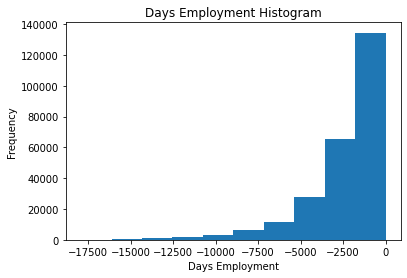

In [ ]:
# Membuat kolom flag anomali 
Train['DAYS_EMPLOYED_ANOM'] = Train["DAYS_EMPLOYED"] == 365243

# Gantikan nilai anomali dengan np.nan
Train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

Train['DAYS_EMPLOYED'].plot.hist(title = 'Days Employment Histogram');
plt.xlabel('Days Employment');

Distribusi terlihat jauh lebih sesuai, dan juga telah dibuat kolom baru untuk memberi tahu model bahwa nilai-nilai ini awalnya anomali.

In [ ]:
Test['DAYS_EMPLOYED_ANOM'] = Test["DAYS_EMPLOYED"] == 365243
Test["DAYS_EMPLOYED"].replace({365243: np.nan}, inplace = True)

print('Ada %d anomali dalam data test dari %d entri' % (Test["DAYS_EMPLOYED_ANOM"].sum(), len(Test)))

Ada 9274 anomali dalam data test dari 48744 entri


Korelasi
Sekarang kita telah berurusan dengan variabel kategori dan outliers.Cara untuk mencoba dan memahami data tersebut adalah dengan mencari korelasi antara fitur dan targetnya. Koefisien korelasi Pearson antara setiap variabel dan target dapat dihitung dengan menggunakan method .corr dataframe.


In [ ]:
#Mencari korelasi pada TARGET dan sortir
correlations = Train.corr()['TARGET'].sort_values()

# Tampilkan Korelasi
print('Korelasi Paling Positif:\n', correlations.tail(15))
print('\nKorelasi Paling Negatif:\n', correlations.head(15))

Korelasi Paling Positif:
 OCCUPATION_TYPE_Laborers                             0.043019
FLAG_DOCUMENT_3                                      0.044346
REG_CITY_NOT_LIVE_CITY                               0.044395
FLAG_EMP_PHONE                                       0.045982
NAME_EDUCATION_TYPE_Secondary / secondary special    0.049824
REG_CITY_NOT_WORK_CITY                               0.050994
DAYS_ID_PUBLISH                                      0.051457
CODE_GENDER_M                                        0.054713
DAYS_LAST_PHONE_CHANGE                               0.055218
NAME_INCOME_TYPE_Working                             0.057481
REGION_RATING_CLIENT                                 0.058899
REGION_RATING_CLIENT_W_CITY                          0.060893
DAYS_EMPLOYED                                        0.074958
DAYS_BIRTH                                           0.078239
TARGET                                               1.000000
Name: TARGET, dtype: float64

Korelasi Palin

Pengaruh Usia terhadap Pembayaran

In [ ]:
# Temukan korelasi Days_Birth dan TARGET
Train['DAYS_BIRTH'] = abs(Train['DAYS_BIRTH'])
Train['DAYS_BIRTH'].corr(Train['TARGET'])

-0.07823930830982694

Seiring bertambahnya usia nasabah, terdapat hubungan linier negatif dengan target yang berarti bahwa seiring bertambahnya usia nasabah, mereka cenderung lebih sering mengembalikan pinjaman tepat waktu.

Mari kita mulai melihat variabel ini. Pertama, kita bisa membuat histogram usia. Kami akan menempatkan sumbu x dalam beberapa tahun untuk membuat plotnya sedikit lebih mudah dipahami.

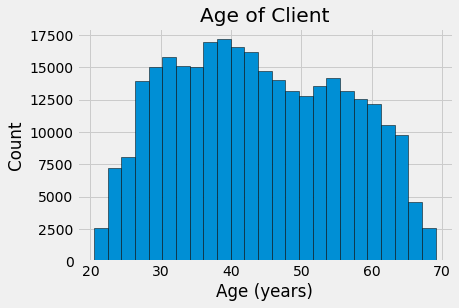

In [ ]:
plt.style.use('fivethirtyeight')

# Plot distribusi usia dalam tahun
plt.hist(Train['DAYS_BIRTH'] / 365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

Distribusi usia tidak memberi tahu kita banyak hal selain tidak ada outliers karena semua usia masuk akal. Untuk memvisualisasikan pengaruh umur terhadap target, selanjutnya kita akan membuat kernel density estimation plot (KDE) yang diwarnai dengan nilai target. 

KDE plot  menunjukkan distribusi variabel tunggal dan dapat dianggap sebagai histogram yang dihaluskan

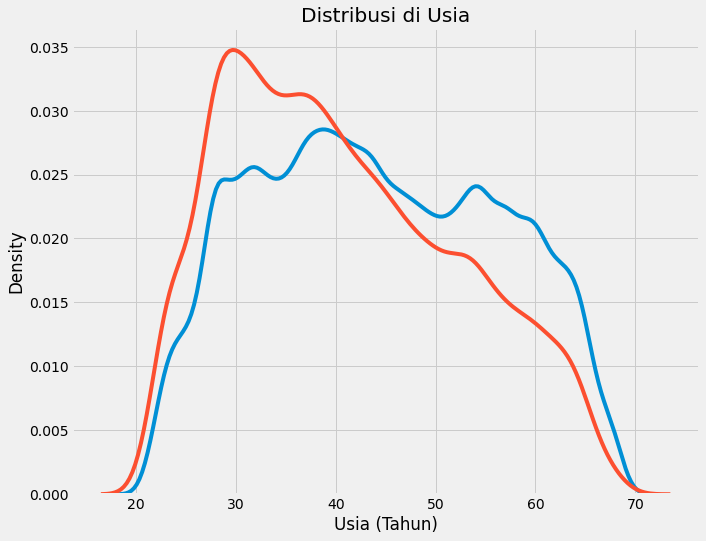

In [ ]:
plt.figure(figsize = (10, 8))

# KDE plot pinjaman yang dilunasi tepat waktu
sns.kdeplot(Train.loc[Train['TARGET'] == 0, 'DAYS_BIRTH'] / 365, label = 'target == 0')

# KDE plot pinjaman yang tidak dibayar tepat waktu
sns.kdeplot(Train.loc[Train['TARGET'] == 1, 'DAYS_BIRTH'] / 365, label = 'target == 1')

# Labeling  plot
plt.xlabel('Usia (Tahun)'); plt.ylabel('Density'); plt.title('Distribusi di Usia');

Kurva target == 1 condong ke arah ujung rentang yang lebih muda. Meskipun ini bukan korelasi yang signifikan, variabel ini kemungkinan besar akan berguna dalam model machine learning karena mempengaruhi TARGET.

Melihat rata-rata kegagalan untuk membayar kembali pinjaman berdasarkan kelompok usia.


In [ ]:
# Informasi usia ke dalam kerangka data terpisah
age_data = Train[['TARGET', 'DAYS_BIRTH']]
age_data['YEARS_BIRTH'] = age_data['DAYS_BIRTH'] / 365

# Bin data usia
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BIRTH'], bins = np.linspace(20, 70, num = 11))
age_data.head(10)

,TARGET,DAYS_BIRTH,YEARS_BIRTH,YEARS_BINNED
0,1,9461,25.920548,"(25.0, 30.0]"
1,0,16765,45.931507,"(45.0, 50.0]"
2,0,19046,52.180822,"(50.0, 55.0]"
3,0,19005,52.068493,"(50.0, 55.0]"
4,0,19932,54.608219,"(50.0, 55.0]"
5,0,16941,46.413699,"(45.0, 50.0]"
6,0,13778,37.747945,"(35.0, 40.0]"
7,0,18850,51.643836,"(50.0, 55.0]"
8,0,20099,55.065753,"(55.0, 60.0]"
9,0,14469,39.641096,"(35.0, 40.0]"


In [ ]:
# Group by bin dan menghitung rata-rata
age_groups  = age_data.groupby('YEARS_BINNED').mean()
age_groups

,TARGET,DAYS_BIRTH,YEARS_BIRTH
YEARS_BINNED,,,
"(20.0, 25.0]",0.123036,8532.795625,23.377522
"(25.0, 30.0]",0.111436,10155.219250,27.822518
"(30.0, 35.0]",0.102814,11854.848377,32.479037
"(35.0, 40.0]",0.089414,13707.908253,37.555913
"(40.0, 45.0]",0.078491,15497.661233,42.459346
"(45.0, 50.0]",0.074171,17323.900441,47.462741
"(50.0, 55.0]",0.066968,19196.494791,52.593136
"(55.0, 60.0]",0.055314,20984.262742,57.491131
"(60.0, 65.0]",0.052737,22780.547460,62.412459


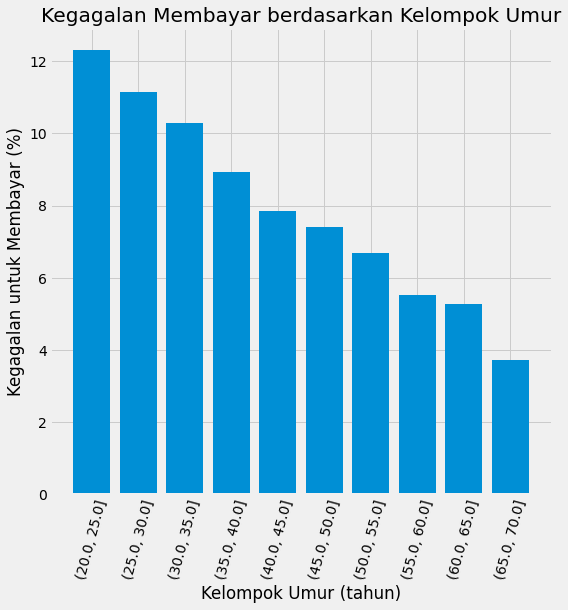

In [ ]:
plt.figure(figsize = (8, 8))

# Buat grafik usia bin dan rata-rata target sebagai plot batang
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75); plt.xlabel('Kelompok Umur (tahun)'); plt.ylabel('Kegagalan untuk Membayar (%)')
plt.title('Kegagalan Membayar berdasarkan Kelompok Umur');

Hasinya adalah nasabah yang lebih muda lebih cenderung tidak mengembalikan pinjaman.

Tingkat kegagalan membayar di atas 10% untuk tiga kelompok usia termuda dan di bawah 5% untuk kelompok usia tertua.



** Sumber Eksterior **

3 variabel dengan korelasi negatif terkuat dengan Target adalah EXT_SOURCE_1, EXT_SOURCE_2, dan EXT_SOURCE_3. Fitur ini mewakili skor yang dinormalisasi dari sumber data eksternal. 

Melihat korelasi fitur EXT_SOURCE dengan TARGET dan satu sama lain.

In [ ]:
# Ekstrak variabel EXT_SOURCE dan menampilkan korelasinya
ext_data = Train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

,TARGET,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,DAYS_BIRTH
TARGET,1.000000,-0.155317,-0.160472,-0.178919,-0.078239
EXT_SOURCE_1,-0.155317,1.000000,0.213982,0.186846,0.600610
EXT_SOURCE_2,-0.160472,0.213982,1.000000,0.109167,0.091996
EXT_SOURCE_3,-0.178919,0.186846,0.109167,1.000000,0.205478
DAYS_BIRTH,-0.078239,0.600610,0.091996,0.205478,1.000000


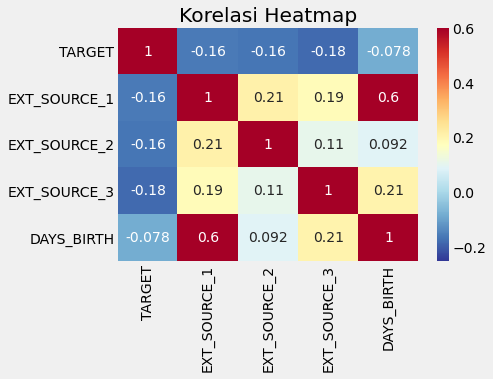

In [ ]:
plt.figure(figsize = (6, 4))

# Heatmap
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Korelasi Heatmap');

Ketiga fitur EXT_SOURCE memiliki korelasi negatif dengan TARGET, yang menunjukkan ketika nilai EXT_SOURCE meningkat, klien cenderung membayar kembali pinjaman. Dapat dilihat juga DAYS_BIRTH berkorelasi positif dengan EXT_SOURCE_1 yang menunjukkan ini merupakan salah satu faktor dalam skor ini adalah usia klien.

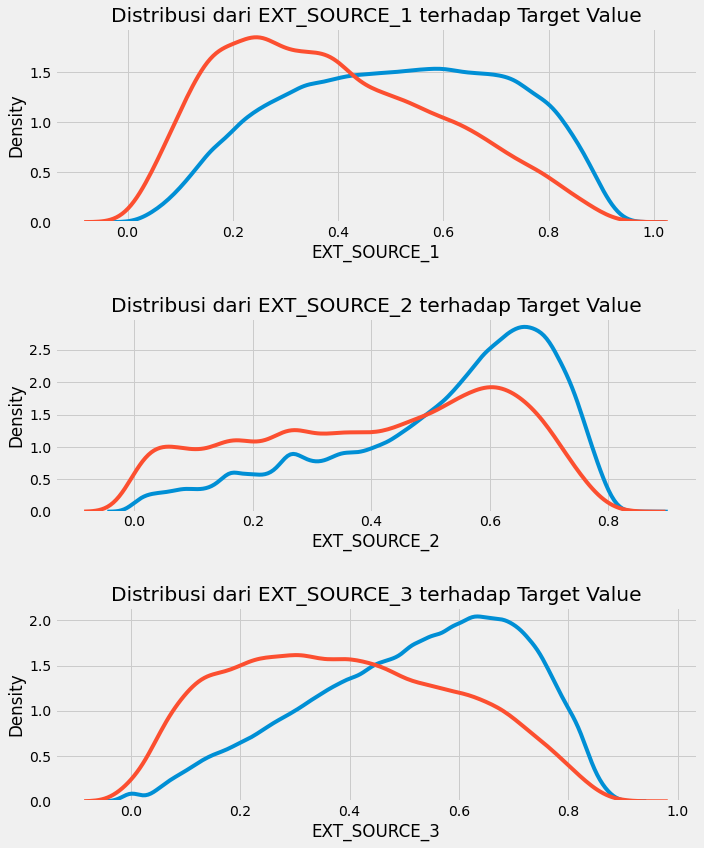

In [ ]:
plt.figure(figsize = (10, 12))

# pengulangan melalui source
for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    
    # membuatbuat subplot baru untuk setiap source
    plt.subplot(3, 1, i + 1)
    # plot pinjaman yang telah dilunasi
    sns.kdeplot(Train.loc[Train['TARGET'] == 0, source], label = 'target == 0')
    # plot pinjaman yang tidak dilunasi
    sns.kdeplot(Train.loc[Train['TARGET'] == 1, source], label = 'target == 1')
    
    # Label plots
    plt.title('Distribusi dari %s terhadap Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_3 menampilkan perbedaan terbesar di antara nilai-nilai TARGET. Tapi variabel ini masih akan berguna untuk model machine learning untuk memprediksi apakah pemohon akan melunasi pinjaman tepat waktu atau tidak.


**Pairs Plot**

Pairs Plot adalah alat eksplorasi yang memungkinkan kita melihat hubungan antara beberapa pasang variabel serta distribusi variabel tunggal. Untuk membuat Pairs Plot di gunakan library seaborn dan fungsi PairGrid.

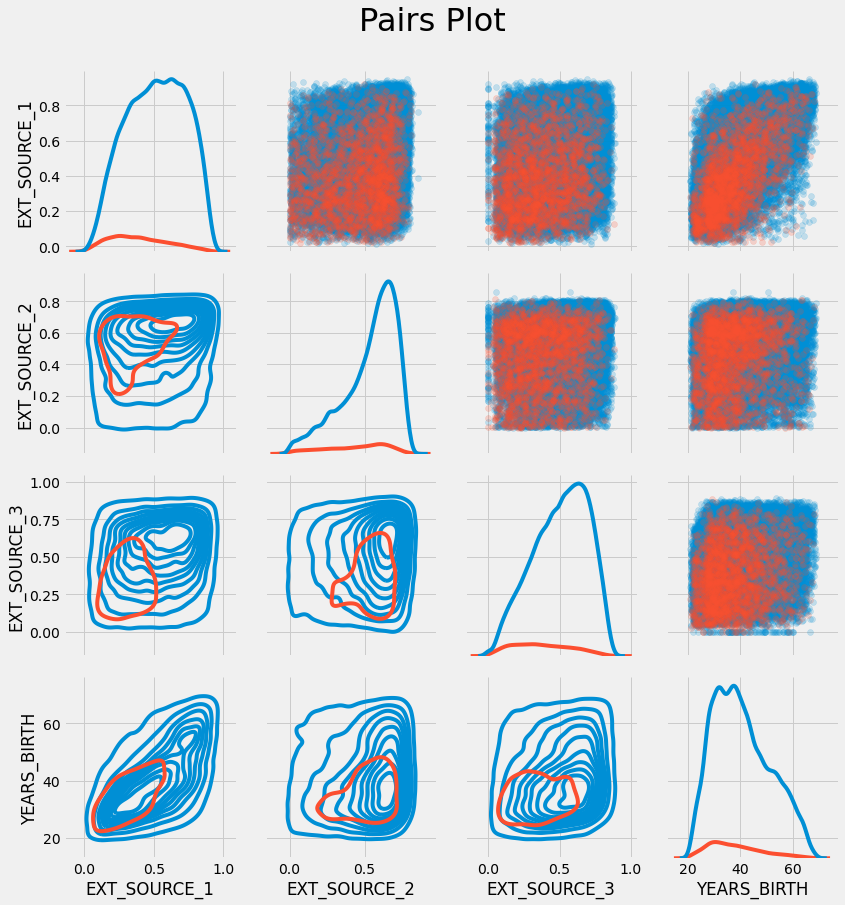

In [ ]:
# Copy data untuk plot
plot_data = ext_data.drop(columns = ['DAYS_BIRTH']).copy()

# Tambahkan usia klien dalam beberapa tahun
plot_data['YEARS_BIRTH'] = age_data['YEARS_BIRTH']

# Buat nilai na dan batasi hingga 100000 baris pertama
plot_data = plot_data.dropna().loc[:100000, :]

# Function untuk menghitung koefisien korelasi antara dua kolom
def corr_func(x, y, **kwargs):
    r = np.corrcoef(x, y)[0][1]
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.2, .8), xycoords=ax.transAxes,
                size = 20)

# Buat objek pairgrid
grid = sns.PairGrid(data = plot_data, size = 3, diag_sharey=False,
                    hue = 'TARGET', 
                    vars = [x for x in list(plot_data.columns) if x != 'TARGET'])

# Upper adalah plot pencar
grid.map_upper(plt.scatter, alpha = 0.2)

# Diagonal adalah histogram
grid.map_diag(sns.kdeplot)

# Bawah adalah density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);

plt.suptitle('Pairs Plot', size = 32, y = 1.05);

Di plot ini, warna merah menunjukkan pinjaman yang belum dilunasi dan biru adalah pinjaman yang sudah dibayarkan. Kita bisa melihat hubungan yang berbeda di dalam data. Tampaknya ada hubungan linier positif sedang antara EXT_SOURCE_1 dan DAYS_BIRTH (atau setara YEARS_BIRTH), yang menunjukkan bahwa fitur ini mungkin mempertimbangkan usia klien.

**Feature Engineering**



Polynomial features

Domain knowledge features

Dalam metode ini, kita akan membuat fitur yang merupakan kekuatan dari fitur yang sudah ada serta istilah interaksi antar fitur yang sudah ada. Misalnya membuat variabel EXT_SOURCE_1 ^ 2 dan EXT_SOURCE_2 ^ 2 dan juga variabel seperti EXT_SOURCE_1 x EXT_SOURCE_2, EXT_SOURCE_1 x EXT_SOURCE_2 ^ 2, EXT_SOURCE_1 ^ 2 x EXT_SOURCE_2 ^ 2, dan seterusnya. 

In [ ]:
# Membuat dataframe baru untuk polynomial features
poly_features = Train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]
poly_features_test = Test[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]

In [ ]:
# imputer untuk menangani missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy = 'median')

poly_target = poly_features['TARGET']

poly_features = poly_features.drop(columns = ['TARGET'])

In [ ]:
# Impute missing values
poly_features = imputer.fit_transform(poly_features)
poly_features_test = imputer.transform(poly_features_test)

from sklearn.preprocessing import PolynomialFeatures
                                  
# Membuat polynomial object dengan degree tertentu
poly_transformer = PolynomialFeatures(degree = 3)

In [ ]:
# Train polynomial features
poly_transformer.fit(poly_features)

# Transform features
poly_features = poly_transformer.transform(poly_features)
poly_features_test = poly_transformer.transform(poly_features_test)
print('Polynomial Features shspe: ', poly_features.shape)

Polynomial Features shspe:  (307511, 35)


Ini menciptakan sejumlah besar fitur baru. Untuk mendapatkan nama tersebut kita harus menggunakan metode Polynomial Featuresl get_feature_names.

In [ ]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

['1',
 'EXT_SOURCE_1',
 'EXT_SOURCE_2',
 'EXT_SOURCE_3',
 'DAYS_BIRTH',
 'EXT_SOURCE_1^2',
 'EXT_SOURCE_1 EXT_SOURCE_2',
 'EXT_SOURCE_1 EXT_SOURCE_3',
 'EXT_SOURCE_1 DAYS_BIRTH',
 'EXT_SOURCE_2^2',
 'EXT_SOURCE_2 EXT_SOURCE_3',
 'EXT_SOURCE_2 DAYS_BIRTH',
 'EXT_SOURCE_3^2',
 'EXT_SOURCE_3 DAYS_BIRTH',
 'DAYS_BIRTH^2']

Ada 35 fitur dengan fitur individual yang ditingkatkan hingga tingkat 3 dan istilah interaksi. Sekarang, kita dapat melihat apakah salah satu fitur baru ini berkorelasi dengan TARGET.

In [ ]:
# membuat dataframe dari features 
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Tambahkan TARGET
poly_features['TARGET'] = poly_target

#Temukan korelasi dengan TARGET
poly_corrs = poly_features.corr()['TARGET'].sort_values()

# Tampilkan yang paling negatif dan yang paling positif
print(poly_corrs.head(10))
print(poly_corrs.tail(5))

EXT_SOURCE_2 EXT_SOURCE_3                -0.193939
EXT_SOURCE_1 EXT_SOURCE_2 EXT_SOURCE_3   -0.189605
EXT_SOURCE_2 EXT_SOURCE_3 DAYS_BIRTH     -0.181283
EXT_SOURCE_2^2 EXT_SOURCE_3              -0.176428
EXT_SOURCE_2 EXT_SOURCE_3^2              -0.172282
EXT_SOURCE_1 EXT_SOURCE_2                -0.166625
EXT_SOURCE_1 EXT_SOURCE_3                -0.164065
EXT_SOURCE_2                             -0.160295
EXT_SOURCE_2 DAYS_BIRTH                  -0.156873
EXT_SOURCE_1 EXT_SOURCE_2^2              -0.156867
Name: TARGET, dtype: float64
DAYS_BIRTH     -0.078239
DAYS_BIRTH^2   -0.076672
DAYS_BIRTH^3   -0.074273
TARGET          1.000000
1                    NaN
Name: TARGET, dtype: float64


Beberapa variabel baru memiliki korelasi yang lebih besar dengan target daripada fitur aslinya. Saat membuat model machine learning, kita dapat mencoba dengan atau tanpa fitur ini untuk menentukan apakah fitur tersebut benar-benar membantu model.


In [ ]:
# menambahkan fitur test ke dalam kerangka data
poly_features_test = pd.DataFrame(poly_features_test, 
                                  columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                                'EXT_SOURCE_3', 'DAYS_BIRTH']))

# Mengabungkan polynomial features ke dataframe data training
poly_features['SK_ID_CURR'] = Train['SK_ID_CURR']
Train_poly = Train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

# Mengabungkan polynomial features ke dataframe data testing
poly_features_test['SK_ID_CURR'] = Test['SK_ID_CURR']
Test_poly = Test.merge(poly_features_test, on = 'SK_ID_CURR', how = 'left')

# Sejajarkan kerangka data
Train_poly, Test_poly = Train_poly.align(Test_poly, join = 'inner', axis = 1)

# Print bentuk baru
print('Training data dengan bentuk fitur polinomial: ', Train_poly.shape)
print('Testing data dengan bentuk fitur polinomial:  ', Test_poly.shape)

Training data dengan bentuk fitur polinomial:  (307511, 275)
Testing data dengan bentuk fitur polinomial:   (48744, 275)


**Domain knowledge features**

CREDIT_INCOME_PERCENT: persentase jumlah kredit relatif terhadap pendapatan klien

ANNUITY_INCOME_PERCENT: persentase anuitas pinjaman relatif terhadap pendapatan klien

CREDIT_TERM: lamanya pembayaran dalam beberapa bulan (karena anuitas adalah jumlah bulanan yang jatuh tempo

DAYS_EMPLOYED_PERCENT: persentase hari kerja relatif terhadap usia klien

In [ ]:
Train_domain = Train.copy()
Test_domain = Test.copy()

Train_domain['CREDIT_INCOME_PERCENT'] = Train_domain['AMT_CREDIT'] / Train_domain['AMT_INCOME_TOTAL']
Train_domain['ANNUITY_INCOME_PERCENT'] = Train_domain['AMT_ANNUITY'] / Train_domain['AMT_INCOME_TOTAL']
Train_domain['CREDIT_TERM'] = Train_domain['AMT_ANNUITY'] / Train_domain['AMT_CREDIT']
Train_domain['DAYS_EMPLOYED_PERCENT'] = Train_domain['DAYS_EMPLOYED'] / Train_domain['DAYS_BIRTH']

In [ ]:
Test_domain['CREDIT_INCOME_PERCENT'] = Test_domain['AMT_CREDIT'] / Test_domain['AMT_INCOME_TOTAL']
Test_domain['ANNUITY_INCOME_PERCENT'] = Test_domain['AMT_ANNUITY'] / Test_domain['AMT_INCOME_TOTAL']
Test_domain['CREDIT_TERM'] = Test_domain['AMT_ANNUITY'] / Test_domain['AMT_CREDIT']
Test_domain['DAYS_EMPLOYED_PERCENT'] = Test_domain['DAYS_EMPLOYED'] / Test_domain['DAYS_BIRTH']

Visualisasikan Variabel Baru

Mengeksplorasi variabel pengetahuan domain ini secara visual dalam grafik. Untuk itu akan di buat plot KDE yang sama diwarnai dengan value TARGET.

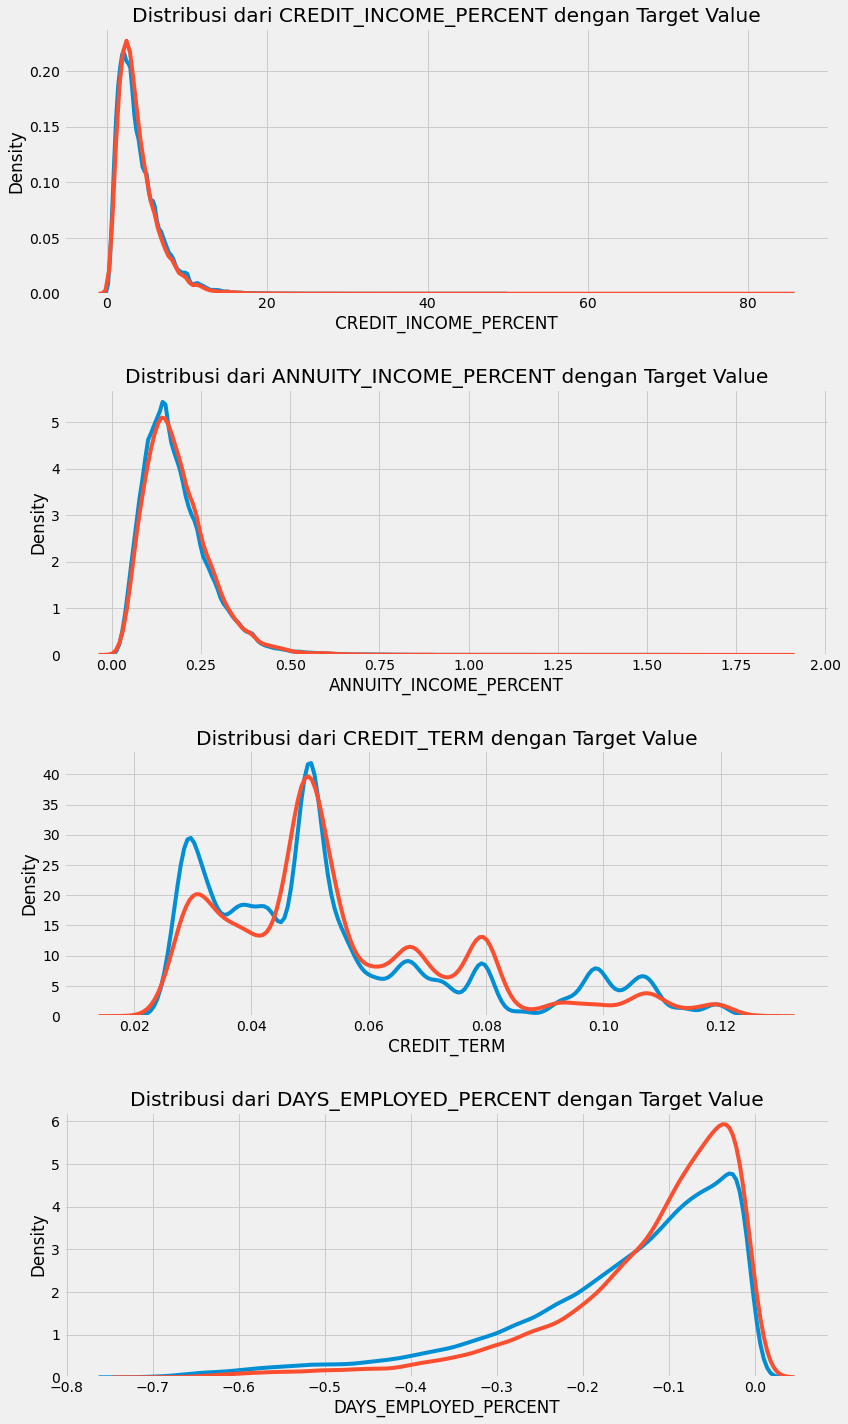

In [ ]:
plt.figure(figsize = (12, 20))
# pengulangan melalui fitur baru
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    
    # Membuat subplot baru untuk setiap sumber
    plt.subplot(4, 1, i + 1)
    # plot pinjaman yang telah dilunasi
    sns.kdeplot(Train_domain.loc[Train_domain['TARGET'] == 0, feature], label = 'target == 0')
    # plot pinjaman yang tidak dilunasi
    sns.kdeplot(Train_domain.loc[Train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    # Label pada plots
    plt.title('Distribusi dari %s dengan Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

**Machine learning Model**

**Logistic Regression Model**


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import SimpleImputer

# Memilih data TARGET dari data training
if 'TARGET' in Train:
    train = Train.drop(columns = ['TARGET'])
else:
    train = Train.copy()
    
# Feature nama
features = list(train.columns)

# Copy data testing
test = Test.copy()

# Imputasi median dari missing values
imputer = SimpleImputer(strategy = 'median')

# Ubah skala setiap fitur menjadi 0-1
scaler = MinMaxScaler(feature_range = (0, 1))

# Fit di data training
imputer.fit(train)

# Transform data training dan data training
train = imputer.transform(train)
test = imputer.transform(Test)

# Ulangi dengan scaler
scaler.fit(train)
train = scaler.transform(train)
test = scaler.transform(test)

print('Training data shape: ', train.shape)
print('Testing data shape: ', test.shape)

Training data shape:  (307511, 240)
Testing data shape:  (48744, 240)


Perubahan yang akan di buat dari setelan model default adalah menurunkan parameter regularisasi, C, yang mengontrol jumlah overfitting (nilai yang lebih rendah akan mengurangi overfitting). Ini akan memberi hasil yang sedikit lebih baik daripada LogisticRegression default.

In [ ]:
from sklearn.linear_model import LogisticRegression

# Membuat model dengan parameter regularisasi
log_reg = LogisticRegression(C = 0.0001)

# Train di data training
log_reg.fit(train, Train_labels)


LogisticRegression(C=0.0001, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
# Membuat Prediksi
log_reg_pred = log_reg.predict_proba(test)[:, 1]

print('Train/Test split results:')

Train/Test split results:


In [ ]:
# Submission dataframe
submit = Test[['SK_ID_CURR']]
submit['TARGET'] = log_reg_pred

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.078515
1,100005,0.137926
2,100013,0.082194
3,100028,0.080921
4,100038,0.132618


In [ ]:
# Menyimpan submission ke format file csv
submit.to_csv('Logistic Regression.csv', index = False)

Random Forest model


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# membuat model random forest classifier
random_forest = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train di data training
random_forest.fit(train, Train_labels)

# Extract fitur importances
feature_importance_values = random_forest.feature_importances_
feature_importances = pd.DataFrame({'feature': features, 'importance': feature_importance_values})

# Prediksi pada data test
predictions = random_forest.predict_proba(test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.7min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.8s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.8s finished


In [ ]:
# Buat submission dataframe
submit = Test[['SK_ID_CURR']]
submit['TARGET'] = predictions

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.13
1,100005,0.21
2,100013,0.05
3,100028,0.14
4,100038,0.20


In [ ]:
# simpan submission dataframe
submit.to_csv('Random Forest.csv', index = False)

Buat Prediksi menggunakan Engineered Features

Satu-satunya cara untuk melihat apakah Polynomial Features dan Domain knowledge meningkatkan model adalah dengan melatih pengujian model pada fitur ini! 
Selanjutnya dapat di bandingkan kinerja model tanpa fitur ini

In [ ]:
poly_features_names = list(Train_poly.columns)

# Impute di polynomial features
imputer = SimpleImputer(strategy = 'median')

poly_features = imputer.fit_transform(Train_poly)
poly_features_test = imputer.transform(Test_poly)

# Scale di polynomial features
scaler = MinMaxScaler(feature_range = (0, 1))

poly_features = scaler.fit_transform(poly_features)
poly_features_test = scaler.transform(poly_features_test)

random_forest_poly = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

In [ ]:
# Train pada data training
random_forest_poly.fit(poly_features, Train_labels)

# Buat prediksi pada data test
predictions = random_forest_poly.predict_proba(poly_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.8min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.5s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.1s finished


In [ ]:
# Buat dataframe submission
submit = Test[['SK_ID_CURR']]
submit['TARGET'] = predictions

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.37
1,100005,0.37
2,100013,0.33
3,100028,0.29
4,100038,0.44


In [ ]:
# Simpan submission dataframe
submit.to_csv('Random Forest Engineered.csv', index = False)

**Testing Domain Features**

In [ ]:
Train_domain = Train_domain.drop(columns = 'TARGET')

domain_features_names = list(Train_domain.columns)

In [ ]:
# Impute di domainnomial features
imputer = SimpleImputer(strategy = 'median')

domain_features = imputer.fit_transform(Train_domain)
domain_features_test = imputer.transform(Test_domain)

# Scale di domainnomial features
scaler = MinMaxScaler(feature_range = (0, 1))

domain_features = scaler.fit_transform(domain_features)
domain_features_test = scaler.transform(domain_features_test)

random_forest_domain = RandomForestClassifier(n_estimators = 100, random_state = 50, verbose = 1, n_jobs = -1)

# Train pada training data
random_forest_domain.fit(domain_features, Train_labels)

# Extract feature importances
feature_importance_values_domain = random_forest_domain.feature_importances_
feature_importances_domain = pd.DataFrame({'feature': domain_features_names, 'importance': feature_importance_values_domain})

# Membuat prediksi pada data test 
predictions = random_forest_domain.predict_proba(domain_features_test)[:, 1]

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.5min finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.7s
[Parallel(n_jobs=2)]: Done 100 out of 100 | elapsed:    1.5s finished


In [ ]:
# Buat dataframe submission
submit = Test[['SK_ID_CURR']]
submit['TARGET'] = predictions

submit.head()

,SK_ID_CURR,TARGET
0,100001,0.18
1,100005,0.25
2,100013,0.16
3,100028,0.11
4,100038,0.18


In [ ]:
# Simpan submission dataframe
submit.to_csv('Random Forest Domain.csv', index = False)